In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, Lambda, GlobalAveragePooling2D, concatenate
from tensorflow.keras.layers import UpSampling2D, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from xrayproject.preprocessing import flip_resize, normalize
from xrayproject.utils_CH import load_train, load_masks
from xrayproject import utils_CH
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from PIL import Image
import pandas as pd
import numpy as np

In [6]:
from xrayproject.combomask import combine_left_right
from xrayproject import combomask

In [7]:
path = '../raw_data/raw_USA/CXR_png'
left_mask = '../raw_data/raw_USA/ManualMask/leftMask'
right_mask = '../raw_data/raw_USA/ManualMask/rightMask'

In [28]:
def USA_data(path, path_right, path_left):
    left,targets, ID = load_masks(100, get_all = False, get_random = False, balanced = True, path = path_left)
    right, ID = load_train(ID, path_right)
    USA_masks = combine_left_right(left, right)
    USA_images, ID = load_train(ID, path)
    return USA_masks, USA_images

In [29]:
masks, images = USA_data(path,right_mask, left_mask)

Using path:  ../raw_data/raw_USA/ManualMask/leftMask
Using bucket 
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0023_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0383_1.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0103_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0162_1.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0082_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0042_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0367_1.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0005_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0040_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0038_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCUCXR_0080_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/leftMask/MCU

Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0162_1.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0082_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0042_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0367_1.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0005_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0040_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0038_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0080_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0144_1.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0101_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0059_0.png
Loading local file:  ../raw_data/raw_USA/ManualMask/rightMask/MCUCXR_0021_0.png
Loading local file:  ../raw_data/raw_USA

Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0005_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0040_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0038_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0080_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0144_1.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0101_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0059_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0021_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0064_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0099_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0258_1.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0060_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0001_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0044_0.png
Loading local file:  ../raw_data/raw_USA/CXR_png/MCUCXR_0084_0

In [10]:
print(len(masks))
print(len(images))

30
30


In [44]:
resized = [flip_resize(images[i], masks[i], input_shape=(128,128)) for i in range(len(images))]

In [45]:
x1 = [n[0] for n in resized]
x2 = [n[2] for n in resized]

y1= [n[1] for n in resized]
y2 = [n[3] for n in resized]

In [46]:
image_dataset = x1 + x2
mask_dataset = y1 + y2 

image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [14]:
mask_dataset[0].shape

(224, 224, 1)

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.3)

In [48]:
y_train[0].shape

(128, 128, 1)

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
epochs = 2
batch_size = 3

In [ ]:
def get_model():
    in1 = tf.keras.layers.Input(shape=[128, 128, 1])

    conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(in1)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool3)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv4)

    up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
    conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up1)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv5)
    
    up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
    conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
    conv6 = Dropout(0.2)(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv6)

    up2 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
    conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
    conv7 = Dropout(0.2)(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
    segmentation = Conv2D(3, (1, 1), activation='sigmoid', name='seg')(conv7)

    model = Model(inputs=[in1], outputs=[segmentation])

    losses = {'seg': 'binary_crossentropy'
            }

    metrics = {'seg': ['acc']
                }
    model.compile(optimizer="adam", loss = losses, metrics=metrics)

    return model

In [49]:
def unet(input_size=(128,128,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [217]:
model9 = unet(input_size=(128,128,1))

In [225]:
model11 = unet(input_size=(128,128,1))

In [51]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [226]:
model11.compile(optimizer="adam",loss=dice_coef_loss, \
                  metrics=[dice_coef, 'binary_accuracy'])

In [187]:
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa

In [224]:
from keras import backend as keras

def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [200]:
# unet_grey_second.compile(optimizer=Adam(lr=1e-5),
#                          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#                          metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])
model6.compile(optimizer="adam",
                         loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                         metrics=["accuracy"])

In [ ]:
X_train.shape

In [245]:
TRAIN_LENGTH = len(X_train)
EPOCHS = 5
VAL_SUBSPLITS = 5
BATCH_SIZE = 32
VALIDATION_STEPS = len(X_test)//BATCH_SIZE//VAL_SUBSPLITS
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model11.fit(X_train,y_train ,epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps = VALIDATION_STEPS,
                          validation_data=(X_test, y_test))

Epoch 1/5
4/4 [==============================] - 39s 10s/step - loss: -0.9046 - dice_coef: 0.9046 - binary_accuracy: 0.9501
Epoch 2/5
4/4 [==============================] - 36s 9s/step - loss: -0.9033 - dice_coef: 0.9033 - binary_accuracy: 0.9504
Epoch 3/5
4/4 [==============================] - 35s 9s/step - loss: -0.9104 - dice_coef: 0.9104 - binary_accuracy: 0.9520
Epoch 4/5
4/4 [==============================] - 35s 9s/step - loss: -0.9090 - dice_coef: 0.9090 - binary_accuracy: 0.9543
Epoch 5/5
4/4 [==============================] - 33s 8s/step - loss: -0.9097 - dice_coef: 0.9097 - binary_accuracy: 0.9524


In [246]:
clam_5 = model11.predict(X_test[2][tf.newaxis, ...]).squeeze();
#not working. . clammy_3 = (1+np.sign(np.resize(clam_3,(224,224,1))))/2

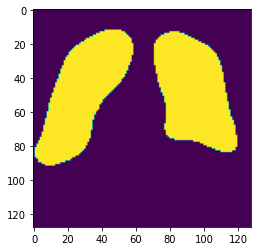

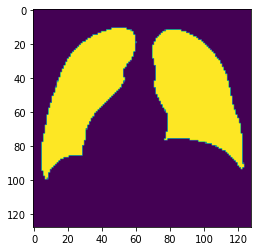

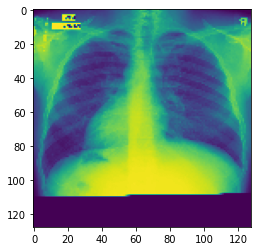

In [247]:
plt.imshow(clam_5)
plt.show()
plt.imshow(y_test[2])
plt.show()
plt.imshow(X_test[2])
plt.show()

In [211]:
bird=np.round(clam_5)
bee1 = np.round(clam_5 - 0.1)
bee2 = np.round(clam_5 - 0.2)
bee3 = np.round(clam_5 - 0.3)
bee4 = np.round(clam_5 - 0.4)
bee5 = np.round(clam_5 - 0.5)
bee6 = np.round(clam_5 - 0.6)
bee7 = np.round(clam_5 - 0.7)
bee8 = np.round(clam_5 - 0.8)
bee9 = np.round(clam_5 - 0.9)

In [115]:
bird.shape

(128, 128)

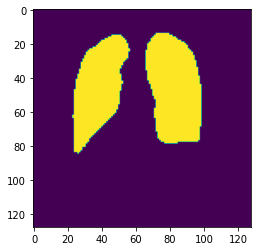

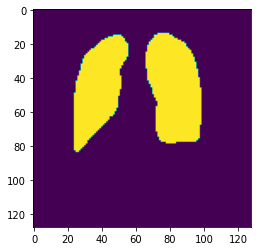

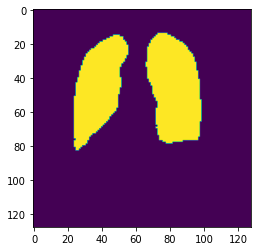

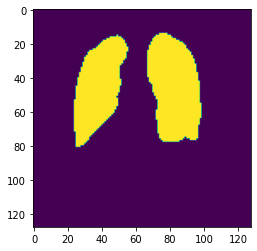

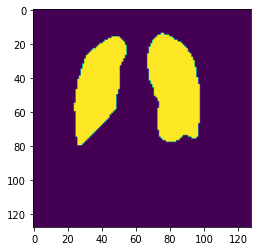

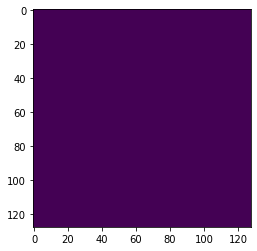

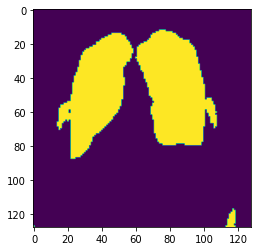

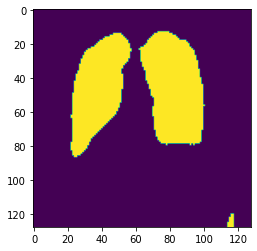

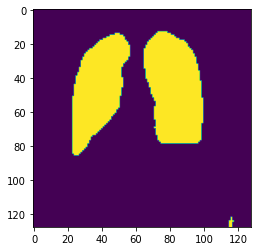

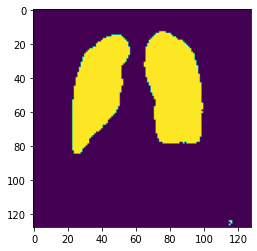

In [212]:
plt.imshow(bird)
plt.show()
plt.imshow(bee1)
plt.show()
plt.imshow(bee2)
plt.show()
plt.imshow(bee3)
plt.show()
plt.imshow(bee4)
plt.show()
plt.imshow(bee5)
plt.show()
plt.imshow(bee6)
plt.show()
plt.imshow(bee7)
plt.show()
plt.imshow(bee8)
plt.show()
plt.imshow(bee9)
plt.show()


In [131]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip

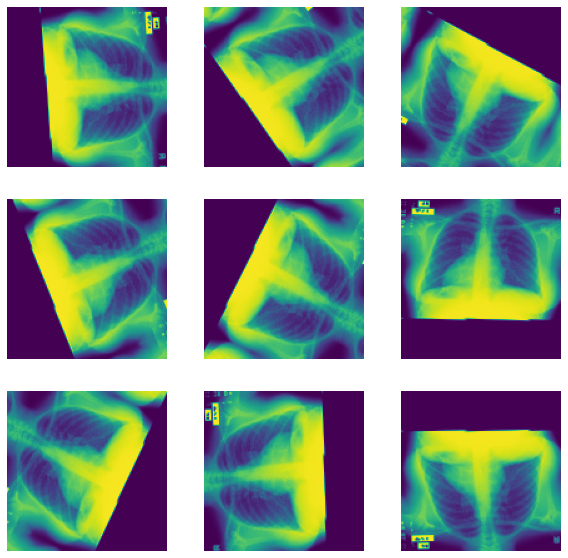

In [213]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.5),
])

plt.figure(figsize=(10, 10))


for i in range(9):
    augmented_image = data_augmentation(np.array([X_test[1]]))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")